In [1]:
%%html
<h1>Time Series</h1>

In [265]:
from datetime import datetime, timedelta
from dateutil.parser import parse as parse_dt
from pathlib import Path
import bottleneck # TODO: Investigate this library, which provides moving-window functions
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from pandas.tseries.offsets import Day, Hour, Minute, MonthEnd
import pytz
from scipy.stats import percentileofscore
now = datetime.now()
now

datetime.datetime(2018, 6, 24, 21, 32, 56, 262730)

In [3]:
"{}/{}/{}".format(now.month, now.day, now.year)

'6/24/2018'

In [10]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [11]:
delta.days

926

In [12]:
delta.seconds

56700

In [13]:
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [14]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [20]:
HTML(Path('data/datetime_types.htm').read_text())

date,"Store calendar date (year, month, day) using the Gregorian calendar."
time,"Store time of day as hours, minutes, seconds, and microseconds."
datetime,Stores both date and time.
timedelta,"Represents the difference between 2 datetime values (as days, seconds, and microseconds."


In [21]:
%%html
<h3>Converting between <code>str</code> and <code>datetime</code></h3>

In [22]:
%%html
<p><code>datetime</code> objects (and <code>pandas.Timestamp</code> objects) can be
formatted as strings using <code>str</code> or the <code>strftime</code> method, passing a
format specification:</p>

In [23]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [24]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [25]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [26]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [28]:
parse_dt('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [29]:
parse_dt('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [32]:
parse_dt('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [33]:
datestrs

['7/6/2011', '8/6/2011']

In [36]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [37]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [38]:
idx[2]

NaT

In [39]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

In [40]:
%%html
<p><code>NaT</code> is <code>pandas</code>'s <code>NA</code> value for timestamp data.</p>

In [41]:
parse_dt('42')

datetime.datetime(2042, 6, 24, 0, 0)

In [97]:
HTML(Path('data/datetime_fmts.htm').read_text())

%Y,4-digit year
%Y,2-digit year
%m,"2-digit month [01, 12]"
%d,"2-digit day [01, 31]"
%H,"Hour (24-hour clock) [00, 23]"
%I,"Hour (12-hour clock) [01, 12]"
%m,"2-digit minute [00, 59]"
%S,"Second [00, 61] (seconds 60, 61 account for leap seconds)"
%w,"Weekday as integer [0 (Sunday), 6]"
%U,"Week number of the year [00, 53]. Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”."
%w,"Week number of the year [00, 53]. Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”."


In [46]:
%%html
<h2>Time Series Basics</h2>

In [51]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.057339
2011-01-05    0.897916
2011-01-07    0.537008
2011-01-08   -0.873498
2011-01-10   -1.067348
2011-01-12   -0.680650
dtype: float64

In [52]:
type(ts)

pandas.core.series.Series

In [53]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [54]:
ts + ts[::2]

2011-01-02    2.114678
2011-01-05         NaN
2011-01-07    1.074016
2011-01-08         NaN
2011-01-10   -2.134696
2011-01-12         NaN
dtype: float64

In [55]:
ts.index.dtype

dtype('<M8[ns]')

In [56]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [57]:
%%html
<h3>Indexing, Selection, Subsetting</h3>

In [58]:
stamp = ts.index[2]
ts[stamp]

0.53700775478850138

In [59]:
ts['1/10/2011']

-1.0673480002984701

In [60]:
ts['20110110']

-1.0673480002984701

In [61]:
longer_ts = Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -2.539216
2000-01-02   -0.459475
2000-01-03   -2.352041
2000-01-04    2.309112
2000-01-05    0.353747
2000-01-06   -0.119421
2000-01-07    2.564379
2000-01-08   -1.621747
2000-01-09   -0.031362
2000-01-10    0.532913
2000-01-11    0.039078
2000-01-12    0.534438
2000-01-13   -0.173362
2000-01-14   -0.007899
2000-01-15   -1.563465
2000-01-16    0.893082
2000-01-17    0.291558
2000-01-18    0.020856
2000-01-19   -0.837233
2000-01-20    0.839727
2000-01-21    0.360819
2000-01-22   -1.355441
2000-01-23    0.375273
2000-01-24    1.579014
2000-01-25   -2.347502
2000-01-26    0.151341
2000-01-27    0.037950
2000-01-28   -0.692389
2000-01-29   -0.334529
2000-01-30    0.317220
                ...   
2002-08-28    0.574243
2002-08-29   -0.065570
2002-08-30   -0.089044
2002-08-31   -1.137832
2002-09-01   -0.267859
2002-09-02   -0.351752
2002-09-03   -0.052945
2002-09-04   -0.582905
2002-09-05   -0.252520
2002-09-06    0.320854
2002-09-07   -0.747188
2002-09-08    0.533093
2002-09-09 

In [62]:
longer_ts['2001']

2001-01-01   -0.849764
2001-01-02   -0.862478
2001-01-03    0.602410
2001-01-04    1.640191
2001-01-05    0.403409
2001-01-06   -0.940428
2001-01-07    1.336137
2001-01-08    0.527428
2001-01-09    0.917439
2001-01-10   -0.679118
2001-01-11   -0.155336
2001-01-12   -0.257202
2001-01-13    0.615004
2001-01-14    0.509746
2001-01-15   -1.774817
2001-01-16    1.132327
2001-01-17    0.976465
2001-01-18    0.774654
2001-01-19    0.802897
2001-01-20    1.178971
2001-01-21   -0.046263
2001-01-22    0.313537
2001-01-23   -1.426518
2001-01-24    1.314931
2001-01-25    0.204881
2001-01-26   -1.117532
2001-01-27    0.358636
2001-01-28    1.068495
2001-01-29    0.484789
2001-01-30    0.048786
                ...   
2001-12-02   -0.515694
2001-12-03    0.016730
2001-12-04    1.226665
2001-12-05    0.240345
2001-12-06    0.326137
2001-12-07    1.365500
2001-12-08   -0.184682
2001-12-09   -1.079597
2001-12-10    0.816603
2001-12-11   -0.260968
2001-12-12    2.708615
2001-12-13   -0.020694
2001-12-14 

In [63]:
longer_ts['2001-05']

2001-05-01   -1.282602
2001-05-02   -0.302015
2001-05-03   -0.753929
2001-05-04    0.161623
2001-05-05   -0.177719
2001-05-06   -0.855875
2001-05-07    1.104141
2001-05-08    0.210196
2001-05-09   -0.299348
2001-05-10   -0.378649
2001-05-11   -0.619102
2001-05-12   -0.279765
2001-05-13   -0.934468
2001-05-14   -1.303602
2001-05-15   -2.402162
2001-05-16    0.283492
2001-05-17   -0.750679
2001-05-18    0.851642
2001-05-19   -0.310738
2001-05-20   -0.068701
2001-05-21   -1.095840
2001-05-22   -1.053046
2001-05-23    0.259093
2001-05-24    0.467336
2001-05-25   -0.210249
2001-05-26    0.546212
2001-05-27    0.604634
2001-05-28   -0.837452
2001-05-29   -1.387550
2001-05-30   -1.512650
2001-05-31    1.173997
Freq: D, dtype: float64

In [64]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.537008
2011-01-08   -0.873498
2011-01-10   -1.067348
2011-01-12   -0.680650
dtype: float64

In [65]:
ts

2011-01-02    1.057339
2011-01-05    0.897916
2011-01-07    0.537008
2011-01-08   -0.873498
2011-01-10   -1.067348
2011-01-12   -0.680650
dtype: float64

In [66]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.537008
2011-01-08   -0.873498
2011-01-10   -1.067348
dtype: float64

In [67]:
ts.truncate(after='1/9/2011')

2011-01-02    1.057339
2011-01-05    0.897916
2011-01-07    0.537008
2011-01-08   -0.873498
dtype: float64

In [70]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4), index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']

/home/fuzzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Colorado,Texas,New York,Ohio
2001-05-02,0.564179,0.739447,1.679424,-0.800234
2001-05-09,-1.525061,0.926173,-0.173401,-1.315482
2001-05-16,-0.392557,0.773448,1.099008,0.847110
2001-05-23,-1.272418,-0.010753,0.953456,0.708785
2001-05-30,1.939975,1.696778,-0.483630,-0.209642


In [71]:
%%html
<h3>Time Series with Duplicate Indices</h3>

In [72]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [74]:
dup_ts.index.is_unique

False

In [75]:
dup_ts['1/3/2000'] # not duplicated

4

In [76]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [77]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [78]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [79]:
%%html
<h2>Date Ranges, Frequencies, and Shifting</h2>

In [80]:
ts

2011-01-02    1.057339
2011-01-05    0.897916
2011-01-07    0.537008
2011-01-08   -0.873498
2011-01-10   -1.067348
2011-01-12   -0.680650
dtype: float64

In [81]:
ts.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [82]:
%%html
<h3>Generating Date Ranges</h3>

In [83]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [84]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [85]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [86]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [87]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [88]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [89]:
%%html
<h3>Frequencies and Date Offsets</h3>

In [93]:
hour = Hour()
hour

<Hour>

In [94]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [95]:
Hour(2) + Minute(30)

<150 * Minutes>

In [96]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [105]:
HTML(Path('data/time_ser_freq.htm').read_text())

D,Day,Calendar daily
B,BusinessDay,Business daily
H,Hour,Hourly
T or min,Minute,Minutely
S,Second,Secondly
L or ms,Milli,Millisecond (1/1000th of 1 second)
U,Micro,Microsecond (1/1000000th of 1 second)
M,MonthEnd,Last calendar day of month
BM,BusinessMonthEnd,Last business day (weekday) of month
MS,MonthBegin,First calendar day of month
BMS,BusinessMonthBegin,First weekday of month


In [106]:
%%html
<h3>Week of Month Dates</h3>

In [108]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [109]:
%%html
<h2>Shifting Data</h2>

In [110]:
ts = Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.193964
2000-02-29    1.375295
2000-03-31    1.774100
2000-04-30   -0.946093
Freq: M, dtype: float64

In [111]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.193964
2000-04-30    1.375295
Freq: M, dtype: float64

In [112]:
ts.shift(-2)

2000-01-31    1.774100
2000-02-29   -0.946093
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [113]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    6.090465
2000-03-31    0.289978
2000-04-30   -1.533280
Freq: M, dtype: float64

In [114]:
ts.shift(2, freq='M')

2000-03-31    0.193964
2000-04-30    1.375295
2000-05-31    1.774100
2000-06-30   -0.946093
Freq: M, dtype: float64

In [115]:
ts.shift(3, freq='D')

2000-02-03    0.193964
2000-03-03    1.375295
2000-04-03    1.774100
2000-05-03   -0.946093
dtype: float64

In [116]:
ts.shift(1, freq='3D')

2000-02-03    0.193964
2000-03-03    1.375295
2000-04-03    1.774100
2000-05-03   -0.946093
dtype: float64

In [117]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.193964
2000-02-29 01:30:00    1.375295
2000-03-31 01:30:00    1.774100
2000-04-30 01:30:00   -0.946093
Freq: M, dtype: float64

In [118]:
%%html
<h3>Shifting Dates with Offsets</h3>

In [120]:
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [121]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [122]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [123]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [124]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [125]:
ts = Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31    0.301234
2000-02-29    0.928098
2000-03-31    0.052713
dtype: float64

In [127]:
ts.resample('M').mean()

2000-01-31    0.301234
2000-02-29    0.928098
2000-03-31    0.052713
Freq: M, dtype: float64

In [129]:
%%html
<h2>Time Zones</h2>

In [130]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [131]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [132]:
%%html
<h3>Localization and Conversion</h3>

In [133]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
print(ts.index.tz)

None


In [134]:
pd.date_range('3/9/2012', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09', '2012-03-10', '2012-03-11', '2012-03-12',
               '2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18'],
              dtype='datetime64[ns, UTC]', freq='D')

In [136]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.214609
2012-03-10 09:30:00+00:00    0.392738
2012-03-11 09:30:00+00:00    1.066604
2012-03-12 09:30:00+00:00   -0.148786
2012-03-13 09:30:00+00:00   -0.302528
2012-03-14 09:30:00+00:00    0.492794
Freq: D, dtype: float64

In [137]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [138]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -1.214609
2012-03-10 04:30:00-05:00    0.392738
2012-03-11 05:30:00-04:00    1.066604
2012-03-12 05:30:00-04:00   -0.148786
2012-03-13 05:30:00-04:00   -0.302528
2012-03-14 05:30:00-04:00    0.492794
Freq: D, dtype: float64

In [139]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.214609
2012-03-10 14:30:00+00:00    0.392738
2012-03-11 13:30:00+00:00    1.066604
2012-03-12 13:30:00+00:00   -0.148786
2012-03-13 13:30:00+00:00   -0.302528
2012-03-14 13:30:00+00:00    0.492794
Freq: D, dtype: float64

In [140]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.214609
2012-03-10 15:30:00+01:00    0.392738
2012-03-11 14:30:00+01:00    1.066604
2012-03-12 14:30:00+01:00   -0.148786
2012-03-13 14:30:00+01:00   -0.302528
2012-03-14 14:30:00+01:00    0.492794
Freq: D, dtype: float64

In [141]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [142]:
%%html
<h3>Operations with Time Zone-Aware Timestamp Objects</h3>

In [143]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [144]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [145]:
stamp_utc.value

1299902400000000000

In [146]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [147]:
# 30 minutes before DST transition
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [148]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [149]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [150]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [152]:
%%html
<h3>Operations Between Different Time Zones</h3>

In [153]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    1.407316
2012-03-08 09:30:00   -0.061772
2012-03-09 09:30:00    1.753559
2012-03-12 09:30:00    0.963755
2012-03-13 09:30:00   -0.675234
2012-03-14 09:30:00   -0.030060
2012-03-15 09:30:00    1.512592
2012-03-16 09:30:00    0.819263
2012-03-19 09:30:00   -0.636649
2012-03-20 09:30:00   -0.101636
Freq: B, dtype: float64

In [154]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [155]:
%%html
<h2>Periods and Period Arithmetic</h2>

In [156]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [157]:
p + 5

Period('2012', 'A-DEC')

In [158]:
p - 2

Period('2005', 'A-DEC')

In [160]:
pd.Period('2014', freq='A-DEC') - p

7

In [162]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [163]:
Series(np.random.randn(6), index=rng)

2000-01    0.889904
2000-02   -1.010619
2000-03   -2.054632
2000-04   -1.555093
2000-05   -1.735468
2000-06   -0.348903
Freq: M, dtype: float64

In [164]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [166]:
%%html
<h3>Period Frequency Conversion</h3>

In [167]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [168]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [169]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [170]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [171]:
p = pd.Period('2007-08', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [172]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.393703
2007    0.019098
2008    0.818594
2009   -2.832489
Freq: A-DEC, dtype: float64

In [173]:
ts.asfreq('M', how='start')

2006-01    0.393703
2007-01    0.019098
2008-01    0.818594
2009-01   -2.832489
Freq: M, dtype: float64

In [174]:
ts.asfreq('B', how='end')

2006-12-29    0.393703
2007-12-31    0.019098
2008-12-31    0.818594
2009-12-31   -2.832489
Freq: B, dtype: float64

In [175]:
%%html
<h3>Quarterly Period Frequencies</h3>

In [176]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [177]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [178]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [179]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [181]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [182]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [183]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [184]:
%%html
<h3>Converting Timestamps to Periods (and Back)</h3>

In [186]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    0.641967
2000-02-29    1.009789
2000-03-31   -1.885839
Freq: M, dtype: float64

In [187]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(np.random.randn(6), index=rng)
ts2.to_period('M')

2000-01   -1.024000
2000-01    1.592071
2000-01    1.740554
2000-02    0.432942
2000-02    0.048221
2000-02   -1.109653
Freq: M, dtype: float64

In [189]:
pts = ts.to_period()
pts

2000-01    0.641967
2000-02    1.009789
2000-03   -1.885839
Freq: M, dtype: float64

In [190]:
pts.to_timestamp(how='end')

2000-01-31    0.641967
2000-02-29    1.009789
2000-03-31   -1.885839
Freq: M, dtype: float64

In [191]:
%%html
<h3>Creating a <code>PeriodIndex</code> from Arrays</h3>

In [192]:
data = pd.read_csv('data/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [193]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [194]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [195]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [196]:
%%html
<h2>Resampling and Frequency Conversion</h2>
<p><strong>Resampling</strong> refers to the process of converting a time series from one
frequency to another. Aggregating higher frequency data to lower frequency is called
<strong>downsampling</strong>, while converting lower frequency to higher frequency is
called <strong>upsampling</strong>.</p>

In [197]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts.resample('M').mean()

2000-01-31    0.301297
2000-02-29    0.046226
2000-03-31    0.257910
2000-04-30    0.042971
Freq: M, dtype: float64

In [198]:
ts.resample('M', kind='period').mean()

2000-01    0.301297
2000-02    0.046226
2000-03    0.257910
2000-04    0.042971
Freq: M, dtype: float64

In [203]:
HTML(Path('data/resample_method_args.htm').read_text())

freq,"String or DateOffset indicating desired resampled frequency, e.g. ‘M’, ‘5min’, or Second(15)"
how=’mean’,"Function name or array function producing aggregated value, for example ‘mean’, ‘ohlc’, np.max. Defaults to ‘mean’. Other common values: ‘first’, ‘last’, ‘median’, ‘ohlc’, ‘max’, ‘min’."
axis=0,"Axis to resample on, default axis=0"
fill_method=None,"How to interpolate when upsampling, as in ’ffill’ or ’bfill’. By default does no interpolation."
closed=’right’,"In downsampling, which end of each interval is closed (inclusive), ’right’ or ’left’. Defaults to ’right’"
label=’right’,"In downsampling, how to label the aggregated result, with the ’right’ or ’left’ bin edge. For example, the 9:30 to 9:35 5-minute interval could be labeled 9:30 or 9:35. Defaults to ’right’ (or 9:35, in this example)."
loffset=None,"Time adjustment to the bin labels, such as ’-1s’/Second(-1) to shift the aggregate labels one second earlier"
limit=None,"When forward or backward filling, the maximum number of periods to fill"
kind=None,Aggregate to periods (’period’’timestamp’); defaults to kind of index the time series has
convention=None,"When resampling periods<, the convention(’start’ or ’end’) for converting the low frequency period to high frequency. Defaults to ’end"


In [204]:
%%html
<h3>Downsampling</h3>

In [205]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [207]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [209]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [210]:
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [211]:
ts.resample('5min', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

In [212]:
%%html
<h4>Open-High-Low-Close (OHLC) Resampling</h4>

In [213]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [214]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [215]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

In [216]:
%%html
<h3>Unsampling and Interpolation</h3>

In [217]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,-0.157835,0.102110,0.530658,-0.259524
2000-01-12,0.670450,-1.252369,-0.026182,1.615920


In [218]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [220]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.157835,0.102110,0.530658,-0.259524
2000-01-06,-0.157835,0.102110,0.530658,-0.259524
2000-01-07,-0.157835,0.102110,0.530658,-0.259524
2000-01-08,-0.157835,0.102110,0.530658,-0.259524
2000-01-09,-0.157835,0.102110,0.530658,-0.259524
2000-01-10,-0.157835,0.102110,0.530658,-0.259524
2000-01-11,-0.157835,0.102110,0.530658,-0.259524
2000-01-12,0.670450,-1.252369,-0.026182,1.615920


In [221]:
frame.resample('D', limit=2).ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.157835,0.102110,0.530658,-0.259524
2000-01-06,-0.157835,0.102110,0.530658,-0.259524
2000-01-07,-0.157835,0.102110,0.530658,-0.259524
2000-01-08,-0.157835,0.102110,0.530658,-0.259524
2000-01-09,-0.157835,0.102110,0.530658,-0.259524
2000-01-10,-0.157835,0.102110,0.530658,-0.259524
2000-01-11,-0.157835,0.102110,0.530658,-0.259524
2000-01-12,0.670450,-1.252369,-0.026182,1.615920


In [222]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.157835,0.102110,0.530658,-0.259524
2000-01-13,0.670450,-1.252369,-0.026182,1.615920


In [223]:
%%html
<h3>Resampling with Periods</h3>

In [224]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.866977,1.254542,-0.097480,0.098142
2000-02,0.288395,0.681279,-0.583852,-1.835097
2000-03,-0.860238,0.003139,0.553693,-0.591096
2000-04,0.531131,0.972999,-0.827931,1.846440
2000-05,-0.044359,-0.443779,0.967323,-0.760120


In [226]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.202620,0.408219,-0.293288,-0.068623
2001,0.372019,0.036765,0.359220,0.161733


In [227]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.202620,0.408219,-0.293288,-0.068623
2000Q2,0.202620,0.408219,-0.293288,-0.068623
2000Q3,0.202620,0.408219,-0.293288,-0.068623
2000Q4,0.202620,0.408219,-0.293288,-0.068623
2001Q1,0.372019,0.036765,0.359220,0.161733
2001Q2,0.372019,0.036765,0.359220,0.161733
2001Q3,0.372019,0.036765,0.359220,0.161733
2001Q4,0.372019,0.036765,0.359220,0.161733


In [228]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.202620,0.408219,-0.293288,-0.068623
2000Q2,0.202620,0.408219,-0.293288,-0.068623
2000Q3,0.202620,0.408219,-0.293288,-0.068623
2000Q4,0.202620,0.408219,-0.293288,-0.068623
2001Q1,0.372019,0.036765,0.359220,0.161733
2001Q2,0.372019,0.036765,0.359220,0.161733
2001Q3,0.372019,0.036765,0.359220,0.161733
2001Q4,0.372019,0.036765,0.359220,0.161733


In [229]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.202620,0.408219,-0.293288,-0.068623
2001Q1,0.202620,0.408219,-0.293288,-0.068623
2001Q2,0.202620,0.408219,-0.293288,-0.068623
2001Q3,0.202620,0.408219,-0.293288,-0.068623
2001Q4,0.372019,0.036765,0.359220,0.161733
2002Q1,0.372019,0.036765,0.359220,0.161733
2002Q2,0.372019,0.036765,0.359220,0.161733
2002Q3,0.372019,0.036765,0.359220,0.161733


In [230]:
%%html
<h3>Time Series Plotting</h3>

In [232]:
close_px_all = pd.read_csv('data/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33
1990-02-08,7.71,0.51,6.35
1990-02-09,8.00,0.52,6.37
1990-02-12,7.94,0.52,6.22
1990-02-13,8.06,0.52,6.23
1990-02-14,8.00,0.52,6.20


NameError: name 'plt' is not defined

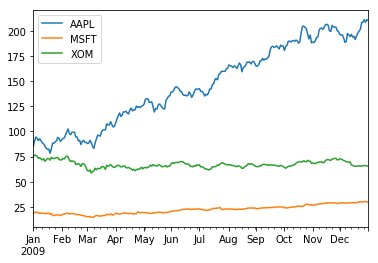

In [234]:
close_px.ix['2009'].plot()
plt.show()

/home/fuzzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


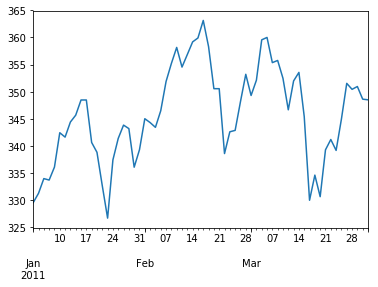

In [235]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

/home/fuzzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


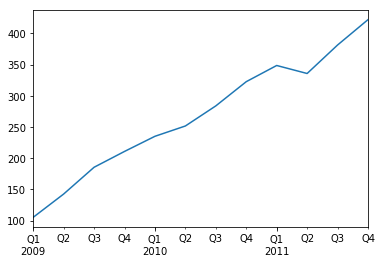

In [238]:
aapl_q = close_px['AAPL'].resample('Q-DEC').ffill()
aapl_q.ix['2009':].plot()

In [239]:
%%html
<h3>Moving Window Functions</h3>

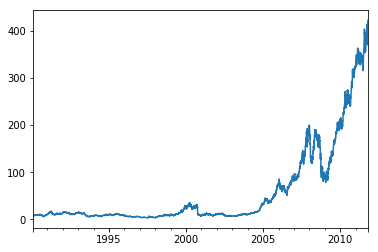

In [240]:
close_px.AAPL.plot()

/home/fuzzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
  """Entry point for launching an IPython kernel.


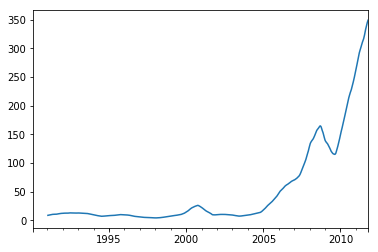

In [243]:
pd.rolling_mean(close_px.AAPL, 250).plot()

In [244]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250

/home/fuzzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,min_periods=10,center=False).std()
  """Entry point for launching an IPython kernel.


1990-02-01          NaN
1990-02-02          NaN
1990-02-05          NaN
1990-02-06          NaN
1990-02-07          NaN
1990-02-08          NaN
1990-02-09          NaN
1990-02-12          NaN
1990-02-13          NaN
1990-02-14     0.148189
1990-02-15     0.141003
1990-02-16     0.135454
1990-02-19     0.130502
1990-02-20     0.128690
1990-02-21     0.124108
1990-02-22     0.132122
1990-02-23     0.132875
1990-02-26     0.129263
1990-02-27     0.127010
1990-02-28     0.123990
1990-03-01     0.122824
1990-03-02     0.119976
1990-03-05     0.121149
1990-03-06     0.135341
1990-03-07     0.148657
1990-03-08     0.192735
1990-03-09     0.226518
1990-03-12     0.246584
1990-03-13     0.266906
1990-03-14     0.285202
                ...    
2011-09-05    25.320023
2011-09-06    25.218932
2011-09-07    25.174057
2011-09-08    25.134226
2011-09-09    25.071408
2011-09-12    25.010059
2011-09-13    24.939448
2011-09-14    24.901731
2011-09-15    24.854159
2011-09-16    24.854202
2011-09-19    24

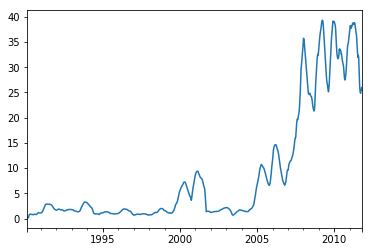

In [245]:
appl_std250.plot()

/home/fuzzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


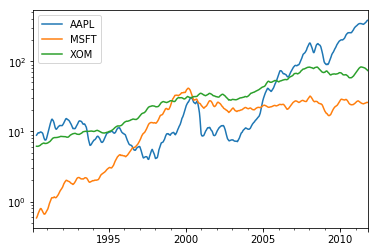

In [248]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)
pd.rolling_mean(close_px, 60).plot(logy=True)

In [250]:
HTML(Path('data/moving_funcs.html').read_text())

rolling_count,Returns number of non-NA observations in each trailing window.
rolling_sum,Moving window sum.
rolling_mean,Moving window mean.
rolling_median,Moving window median.
"rolling_var, rolling_std","Moving window variance and standard deviation, respectively. Uses $n-1$ denominator."
"rolling_skew, rolling_kurt","Moving window skewness (3rd moment) and kurtosis (4th moment), respectively."
"rolling_min, rolling_max",Moving window minimum and maximum.
rolling_quantile,Moving window score at percentile/sample quantile.
"rolling_corr, rolling_cov",Moving window correlation and covariance.
rolling_apply,Apply generic array function over a moving window.
ewma,Exponentially-weighted moving average.


In [253]:
%%html
<h3>Exponentially-Weighted Functions</h3>

In [256]:
%%html
<p>An alternative to using a static window size with equally-weighted observations is to
speciry a constant <strong>decay factor</strong> to give more weight to more recent
observations.</p>
<p>If $\mathrm{ma}_t$ is the moving average result at time $t$ and $x$ is the time series
in question, each value in the result is computed as $\mathrm{ma}_{t-1}+x_{-t}(a-1)$,
where $a$ is the decay factor, which can be specified using a <strong>span</strong>, which
makes the result comparable to a simple moving window function with window size equal to the
span.</p>

/home/fuzzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,min_periods=50,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/home/fuzzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,adjust=True,ignore_na=False).mean()
  after removing the cwd from sys.path.


Text(0.5,1,'Exponentially-weighted MA')

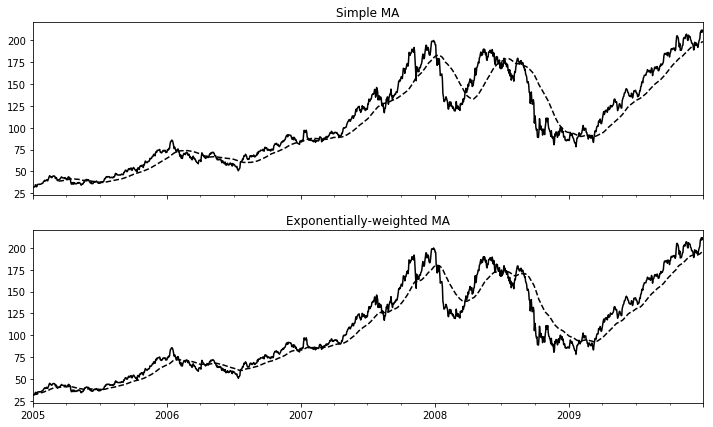

In [259]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 7))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

In [260]:
%%html
<h3>Binary Moving Window Functions</h3>

In [263]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

NameError: name 'spx_px' is not defined

In [264]:
%%html
<h3>User-Defined Moving Window Functions</h3>

/home/fuzzy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  This is separate from the ipykernel package so we can avoid doing imports until


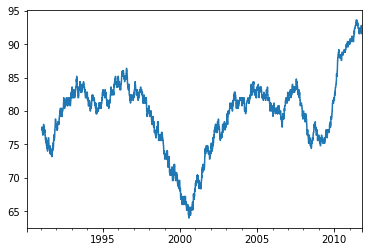

In [267]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
returns = close_px.pct_change()
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()